### Pre-Processing and EDA for raw data

In [1]:
import pandas as pd

# Load your DataFrame from the CSV file
df = pd.read_csv('allReviews.csv')

# Get the number of rows and columns
num_rows, num_columns = df.shape

# Print the number of rows and columns
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 10042
Number of columns: 5


In [2]:
#Missing values in data
df.isnull().sum()

Unnamed: 0    0
type          0
reviewText    0
vote          0
overall       0
dtype: int64

In [3]:
# Dropping missing values
df.dropna(axis = 0, how ='any',inplace=True) ;

In [4]:
# Get the number of rows and columns
num_rows, num_columns = df.shape

# Print the number of rows and columns
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 10042
Number of columns: 5


In [5]:
print(df.head())

   Unnamed: 0         type                                         reviewText  \
0           0  electronics  This is the best novel I have read in 2 or 3 y...   
1           1  electronics  Pages and pages of introspection, in the style...   
2           2  electronics  This is the kind of novel to read when you hav...   
3           3  electronics  What gorgeous language! What an incredible wri...   
4           4  electronics  I was taken in by reviews that compared this b...   

  vote  overall  
0   67      5.0  
1    5      3.0  
2    4      5.0  
3   13      5.0  
4    8      3.0  


#### Distribution of the Column

In [6]:

df['overall'].value_counts()

overall
5.0    5902
4.0    1672
3.0    1025
1.0     882
2.0     561
Name: count, dtype: int64

In [7]:
df['overall'].value_counts(normalize=True)

overall
5.0    0.587732
4.0    0.166501
3.0    0.102071
1.0    0.087831
2.0    0.055865
Name: proportion, dtype: float64

In [8]:
df['vote'].value_counts()

vote
2      3364
3      1849
4       898
5       612
6       449
       ... 
163       1
173       1
119       1
732       1
262       1
Name: count, Length: 176, dtype: int64

In [9]:
df['vote'].value_counts(normalize=True)

vote
2      0.334993
3      0.184127
4      0.089424
5      0.060944
6      0.044712
         ...   
163    0.000100
173    0.000100
119    0.000100
732    0.000100
262    0.000100
Name: proportion, Length: 176, dtype: float64

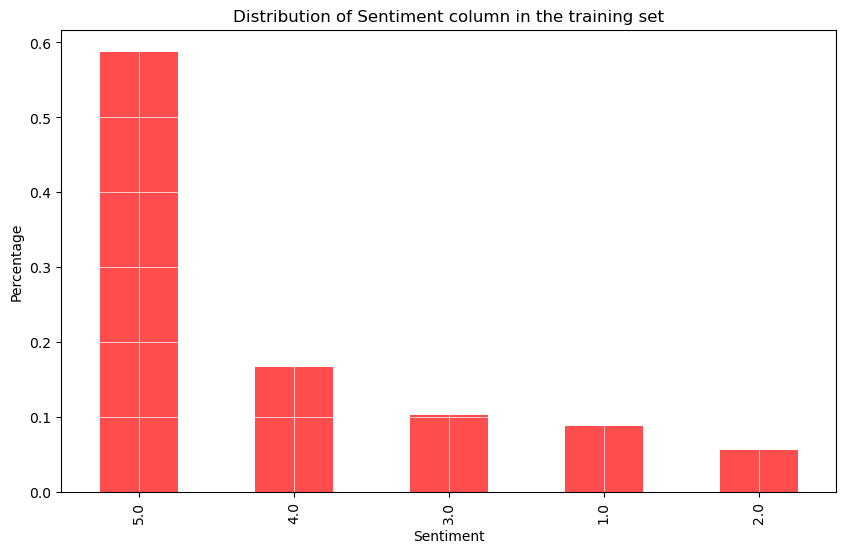

In [17]:
import matplotlib.pyplot as plt

# Calculate the percentage distribution of sentiment values
sentiment_distribution = df['overall'].value_counts(normalize=True)

# Plotting the distribution using matplotlib
plt.figure(figsize=(10, 6))
sentiment_distribution.plot(kind='bar', color='red', alpha=0.7)

plt.title('Distribution of Sentiment column in the training set')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.grid(color='white', linestyle='-', linewidth=0.5)
plt.show()


In [20]:
# Define a function to count words in a sentence
def count_words(sentence):
    # Split the sentence into words and count them
    words = sentence.split()
    return len(words)

# Apply the function to each row of the 'reviewText' column
df['word_count'] = df['reviewText'].apply(count_words)

# Display the DataFrame with the word counts
print(df[['reviewText', 'word_count']])

                                              reviewText  word_count
0      This is the best novel I have read in 2 or 3 y...         184
1      Pages and pages of introspection, in the style...          79
2      This is the kind of novel to read when you hav...         365
3      What gorgeous language! What an incredible wri...         217
4      I was taken in by reviews that compared this b...         258
...                                                  ...         ...
10037  This is the most comfortable shoe I've ever ha...         114
10038  I am a recess aide and on my feet all day long...         272
10039  I've had these shoes for about a week now and ...          69
10040  Good light weight shoe...had to add insole for...          10
10041  This is a shoe I will wear with black dress pa...          54

[10042 rows x 2 columns]


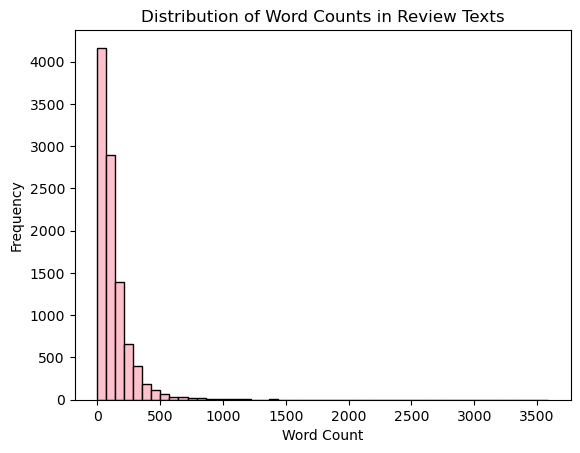

In [21]:
import matplotlib.pyplot as plt

# Plot a histogram of word counts
plt.hist(df['word_count'], bins=50, color='pink', edgecolor='black')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in Review Texts')
plt.show()


In [22]:
# Find the minimum and maximum word count
min_word_count = df['word_count'].min()
max_word_count = df['word_count'].max()

print("Minimum word count:", min_word_count)
print("Maximum word count:", max_word_count)


Minimum word count: 1
Maximum word count: 3588


In [23]:
# Count the number of entries with word_count within specific ranges
count_1_to_100 = ((df['word_count'] >= 1) & (df['word_count'] <= 100)).sum()
count_100_to_500 = ((df['word_count'] > 100) & (df['word_count'] <= 500)).sum()
count_500_to_1000 = ((df['word_count'] > 500) & (df['word_count'] <= 1000)).sum()
count_more_than_1000 = (df['word_count'] > 1000).sum()

print("Number of entries with word count between 1 and 100:", count_1_to_100)
print("Number of entries with word count between 100 and 500:", count_100_to_500)
print("Number of entries with word count between 500 and 1000:", count_500_to_1000)
print("Number of entries with word count more than 1000:", count_more_than_1000)


Number of entries with word count between 1 and 100: 5577
Number of entries with word count between 100 and 500: 4231
Number of entries with word count between 500 and 1000: 197
Number of entries with word count more than 1000: 37


In [24]:
from collections import Counter

# Combine all the reviewText into a single string
all_text = ' '.join(df['reviewText'])

# Split the combined text into words
words = all_text.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Find the ten most common words
most_common_words = word_counts.most_common(10)

print("The ten most common words are:")
for word, count in most_common_words:
    print(f"'{word}': {count} occurrences")


The ten most common words are:
'the': 57256 occurrences
'and': 35436 occurrences
'a': 35010 occurrences
'I': 34576 occurrences
'to': 33641 occurrences
'of': 21334 occurrences
'is': 20862 occurrences
'it': 18861 occurrences
'for': 15975 occurrences
'this': 13793 occurrences


In [25]:
from collections import Counter

# Combine all the reviewText into a single string
all_text = ' '.join(df['reviewText'])

# Split the combined text into words
words = all_text.split()

# Filter out words with length more than 4 characters
words_filtered = [word for word in words if len(word) > 9]

# Count the occurrences of each word
word_counts = Counter(words_filtered)

# Find the ten most common words
most_common_words = word_counts.most_common(10)

print("The ten most common words with length more than 4 characters are:")
for word, count in most_common_words:
    print(f"'{word}': {count} occurrences")


The ten most common words with length more than 4 characters are:
'definitely': 708 occurrences
'headphones': 404 occurrences
'everything': 398 occurrences
'especially': 356 occurrences
'calculator': 324 occurrences
'completely': 275 occurrences
'experience': 270 occurrences
'absolutely': 258 occurrences
'difference': 254 occurrences
'comfortable': 239 occurrences


In [26]:
from collections import Counter

# Combine all the reviewText into a single string
all_text = ' '.join(df['reviewText'])

# Split the combined text into words
words = all_text.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Specify the words to count
words_to_count = ['love', 'like', 'fantastic', 'perfect']

# Find the occurrences of each specified word
word_occurrences = {word: word_counts[word] for word in words_to_count}

print("Occurrences of specified words:")
for word, count in word_occurrences.items():
    print(f"'{word}': {count} occurrences")


Occurrences of specified words:
'love': 1519 occurrences
'like': 4447 occurrences
'fantastic': 97 occurrences
'perfect': 553 occurrences


In [61]:
df.to_csv('review_data_EDA.csv')

### EDA AFTER BERT

In [27]:
import pandas as pd
df = pd.read_csv('/home/moeingcp2024/Project_GWAR/Final_AllReview.csv')


In [28]:
#Missing values in training set
df.isnull().sum()

index         0
type          0
reviewText    0
vote          0
overall       0
             ..
BertE764      0
BertE765      0
BertE766      0
BertE767      0
BertE768      0
Length: 775, dtype: int64

In [29]:
df.head()

index         type                                         reviewText  \
0      0  electronics  This is the best novel I have read in 2 or 3 y...   
1      1  electronics  Pages and pages of introspection, in the style...   
2      2  electronics  This is the kind of novel to read when you hav...   
3      3  electronics  What gorgeous language! What an incredible wri...   
4      4  electronics  I was taken in by reviews that compared this b...   

   vote  overall   Len Sentiment Label    BertE1    BertE2    BertE3  ...  \
0    67        5  1095        Positive  0.046339  0.115857  0.451058  ...   
1     5        3   456        Negative  0.129456  0.065411  0.548331  ...   
2     4        5  2102        Positive -0.355159  0.127422  0.233155  ...   
3    13        5  1209        Positive -0.044043  0.121501  0.413616  ...   
4     8        3  1433        Negative -0.082056  0.010261  0.370129  ...   

   BertE759  BertE760  BertE761  BertE762  BertE763  BertE764  BertE765  \
0 -0.508686  0.051705  0.091324 -0.150980  0.063616 -0.687123  0.078866   
1 -0.716085  0.150910  0.101375 -0.086490  0.158154 -0.826815  0.170796   
2 -0.314753 -0.189285  0.026796 -0.257576 -0.213010 -0.402920  0.114576   
3 -0.504355  0.011264  0.129606 -0.136448 -0.003818 -0.689733  0.111616   
4 -0.349689 -0.103826  0.089887 -0.157176 -0.045742 -0.475303  0.087747   

   BertE766  BertE767  BertE768  
0 -0.418712 -0.042212 -0.481806  
1 -0.668049 -0.175799 -0.662632  
2 -0.179501  0.088391 -0.097999  
3 -0.432194 -0.009996 -0.420544  
4 -0.239922  0.035235 -0.336041  

[5 rows x 775 columns]

### Examples of each sentiment

In [30]:
# Positive tweet
print("\033[1mPositive Review example\033[0m :", df[df['Sentiment Label']=='Positive']['reviewText'].values[0])
print()
#negative_text
print("\033[1mNegative Review example \033[0m :""Negative Tweet example :",df[df['Sentiment Label']=='Negative']['reviewText'].values[0])

Positive Review example : This is the best novel I have read in 2 or 3 years.  It is everything that fiction should be -- beautifully written, engaging, well-plotted and structured.  It has several layers of meanings -- historical, family,  philosophical and more -- and blends them all skillfully and interestingly.  It makes the American grad student/writers' workshop "my parents were  mean to me and then my professors were mean to me" trivia look  childish and silly by comparison, as they are.
Anyone who says this is an  adolescent girl's coming of age story is trivializing it.  Ignore them.  Read this book if you love literature.
I was particularly impressed with  this young author's grasp of the meaning and texture of the lost world of  French Algeria in the 1950's and '60's...particularly poignant when read in  1999 from another ruined and abandoned French colony, amid the decaying  buildings of Phnom Penh...
I hope the author will write many more books  and that her publishers wil

### Distribution of the Sentiment Column

In [31]:
print(df['Sentiment Label'].value_counts())


Sentiment Label
 Positive     5674
Positive      1560
 Negative     1304
  Positive     818
Negative       685
positive         1
Name: count, dtype: int64


### Lablel Correction

In [32]:
replacement_mapping = {'Positive': 'Positive', 'Positive': 'Positive', 'Positive': 'positive', "Negative": "Negative", "Positive" : "positive", "Positive":"positive" }
df['Sentiment Label'] = df['Sentiment Label'].str.strip()

# Replace values in the DataFrame column in place
df['Sentiment Label'].replace(replacement_mapping, inplace=True)

In [33]:
df['Sentiment Label'] = df['Sentiment Label'].str.strip()
print(df['Sentiment Label'].value_counts())

Sentiment Label
positive    8053
Negative    1989
Name: count, dtype: int64


### Distribution of the Sentiment Column

In [34]:
df['Sentiment Label'].value_counts()

Sentiment Label
positive    8053
Negative    1989
Name: count, dtype: int64

In [35]:
df['Sentiment Label'].value_counts(normalize=True)

Sentiment Label
positive    0.801932
Negative    0.198068
Name: proportion, dtype: float64

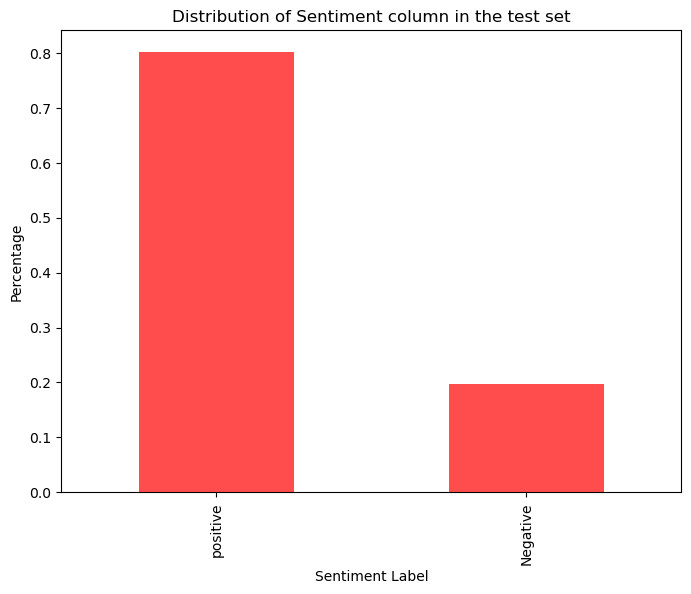

In [36]:
import matplotlib.pyplot as plt

# Calculate the value counts with normalization
value_counts_normalized = df['Sentiment Label'].value_counts(normalize=True)

# Plot the bar chart
plt.figure(figsize=(8, 6))
value_counts_normalized.plot(kind='bar', color='red', alpha=0.7)

# Set the title and labels
plt.title('Distribution of Sentiment column in the test set')
plt.xlabel('Sentiment Label')
plt.ylabel('Percentage')

# Show the plot
plt.show()

### Analyzing Text Statistics

In [37]:
df['text_len'] = df['reviewText'].astype(str).apply(len)
df['text_word_count'] = df['reviewText'].apply(lambda x: len(str(x).split()))

In [38]:
df.head(3)


index         type                                         reviewText  \
0      0  electronics  This is the best novel I have read in 2 or 3 y...   
1      1  electronics  Pages and pages of introspection, in the style...   
2      2  electronics  This is the kind of novel to read when you hav...   

   vote  overall   Len Sentiment Label    BertE1    BertE2    BertE3  ...  \
0    67        5  1095        positive  0.046339  0.115857  0.451058  ...   
1     5        3   456        Negative  0.129456  0.065411  0.548331  ...   
2     4        5  2102        positive -0.355159  0.127422  0.233155  ...   

   BertE761  BertE762  BertE763  BertE764  BertE765  BertE766  BertE767  \
0  0.091324 -0.150980  0.063616 -0.687123  0.078866 -0.418712 -0.042212   
1  0.101375 -0.086490  0.158154 -0.826815  0.170796 -0.668049 -0.175799   
2  0.026796 -0.257576 -0.213010 -0.402920  0.114576 -0.179501  0.088391   

   BertE768  text_len  text_word_count  
0 -0.481806      1095              184  
1 -0.662632       456               79  
2 -0.097999      2102              365  

[3 rows x 777 columns]

In [39]:
pos = df[df['Sentiment Label']=='positive']
neg = df[df['Sentiment Label']=='Negative']

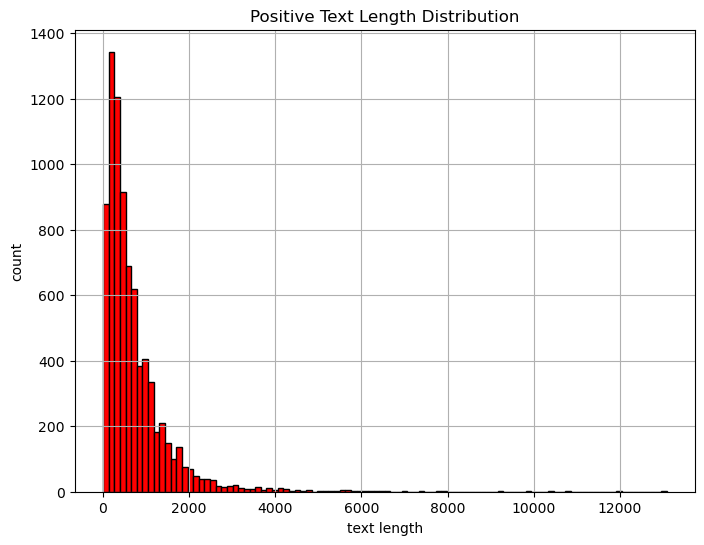

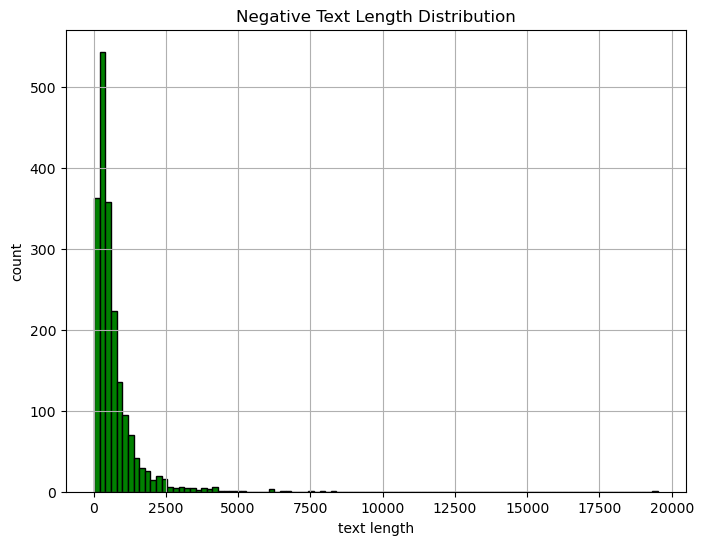

In [40]:
import matplotlib.pyplot as plt

# Plot histogram for positive text length distribution
plt.figure(figsize=(8, 6))
plt.hist(pos['text_len'], bins=100, color='red', edgecolor='black')
plt.xlabel('text length')
plt.ylabel('count')
plt.title('Positive Text Length Distribution')
plt.grid(True)
plt.show()

# Plot histogram for negative text length distribution
plt.figure(figsize=(8, 6))
plt.hist(neg['text_len'], bins=100, color='green', edgecolor='black')
plt.xlabel('text length')
plt.ylabel('count')
plt.title('Negative Text Length Distribution')
plt.grid(True)
plt.show()


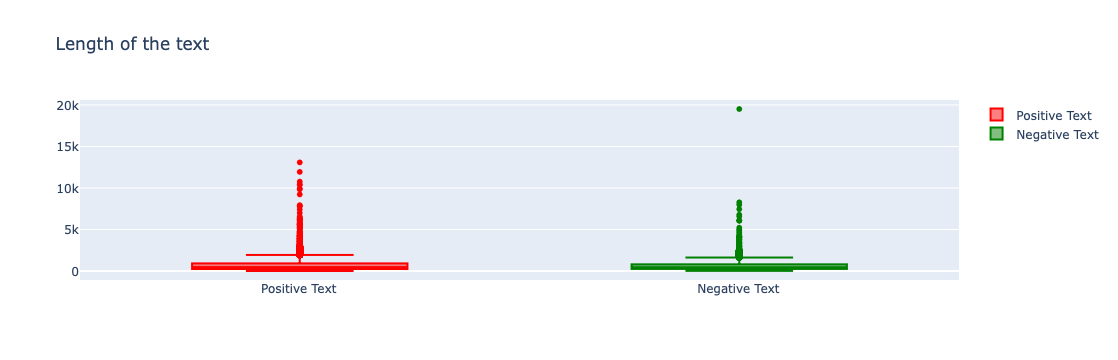

In [45]:
from plotly.offline import iplot

trace0 = go.Box(
    y=pos['text_len'],
    name='Positive Text',
    marker=dict(color='red'),
    boxpoints='suspectedoutliers'  # Set the boxpoints parameter here
)

trace1 = go.Box(
    y=neg['text_len'],
    name='Negative Text',
    marker=dict(color='green'),
    boxpoints='suspectedoutliers'  # Set the boxpoints parameter here
)



data = [trace0, trace1]
layout = go.Layout(title="Length of the text")
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename="Length of the text of different polarities")


### Removing outlier

In [119]:
# Identify indices of suspected outliers
pos_outliers_indices = pos['text_len'][pos['text_len'] > pos['text_len'].median() + 1.5 * (pos['text_len'].quantile(0.75) - pos['text_len'].quantile(0.25))].index
neg_outliers_indices = neg['text_len'][neg['text_len'] > neg['text_len'].median() + 1.5 * (neg['text_len'].quantile(0.75) - neg['text_len'].quantile(0.25))].index

# Remove suspected outliers from the DataFrame
pos_cleaned = pos.drop(pos_outliers_indices)
neg_cleaned = neg.drop(neg_outliers_indices)

In [125]:
# Count text length after removing outliers for positive and negative data
pos_cleaned['text_len_after_outliers'] = pos_cleaned['reviewText'].apply(len)
neg_cleaned['text_len_after_outliers'] = neg_cleaned['reviewText'].apply(len)

# Display the first few rows of cleaned data with text length after removing outliers
print("Positive Text Lengths after Outlier Removal:")
print(pos_cleaned['text_len_after_outliers'].head())
print("\nNegative Text Lengths after Outlier Removal:")
print(neg_cleaned['text_len_after_outliers'].head())


Positive Text Lengths after Outlier Removal:
0    1095
3    1209
5     417
7     274
9    1294
Name: text_len_after_outliers, dtype: int64

Negative Text Lengths after Outlier Removal:
1     456
6     888
13    852
18    219
31    233
Name: text_len_after_outliers, dtype: int64


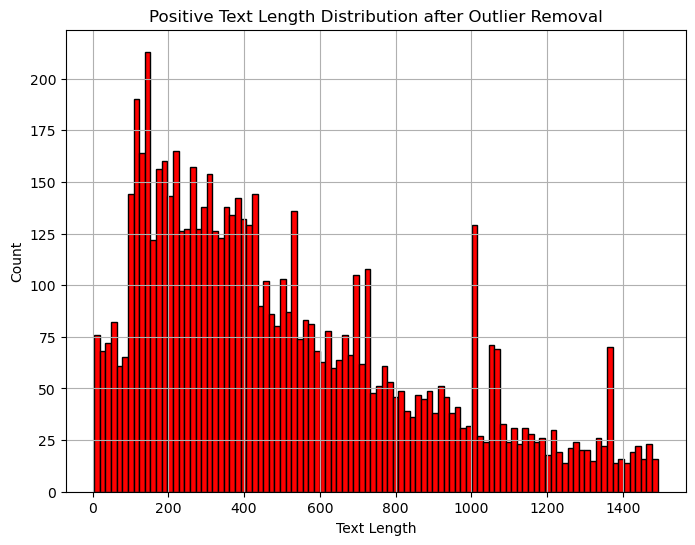

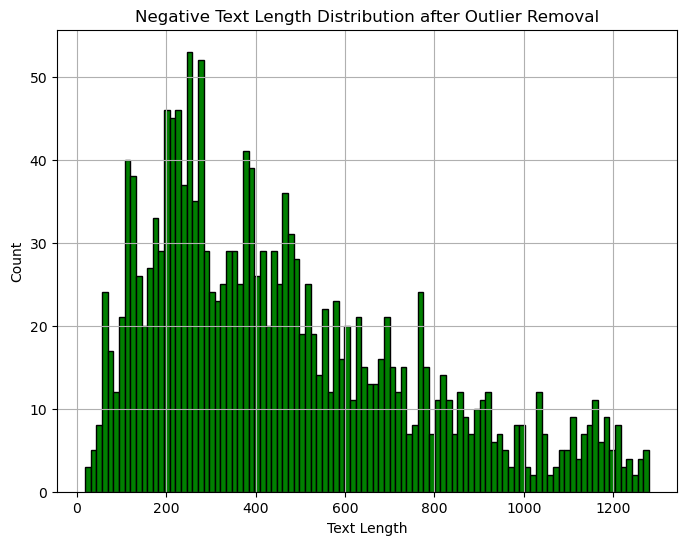

In [126]:
import matplotlib.pyplot as plt

# Plot histogram for positive text length distribution after removing outliers
plt.figure(figsize=(8, 6))
plt.hist(pos_cleaned['text_len_after_outliers'], bins=100, color='red', edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.title('Positive Text Length Distribution after Outlier Removal')
plt.grid(True)
plt.show()

# Plot histogram for negative text length distribution after removing outliers
plt.figure(figsize=(8, 6))
plt.hist(neg_cleaned['text_len_after_outliers'], bins=100, color='green', edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.title('Negative Text Length Distribution after Outlier Removal')
plt.grid(True)
plt.show()


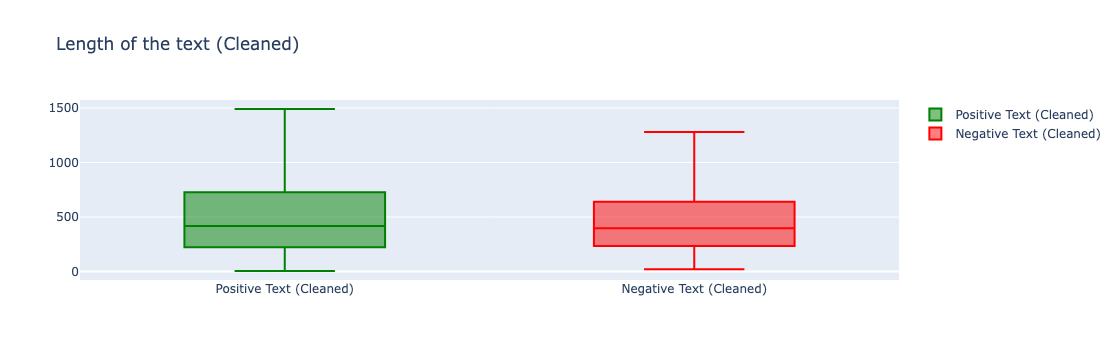

In [120]:
# Create a new plot with the cleaned data
trace2 = go.Box(
    y=pos_cleaned['text_len'],
    name='Positive Text (Cleaned)',
    marker=dict(color='green'),
    boxpoints=False  # Do not show individual data points for the cleaned data
)

trace3 = go.Box(
    y=neg_cleaned['text_len'],
    name='Negative Text (Cleaned)',
    marker=dict(color='red'),
    boxpoints=False  # Do not show individual data points for the cleaned data
)

# Define the new plot data and layout
data_cleaned = [trace2, trace3]
layout_cleaned = go.Layout(title="Length of the text (Cleaned)")

# Create the new figure with cleaned data
fig_cleaned = go.Figure(data=data_cleaned, layout=layout_cleaned)

# Plot the cleaned figure
iplot(fig_cleaned, filename="Length of the text with suspected outliers removed (Cleaned)")


### Distribution of top unigrams

In [64]:
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

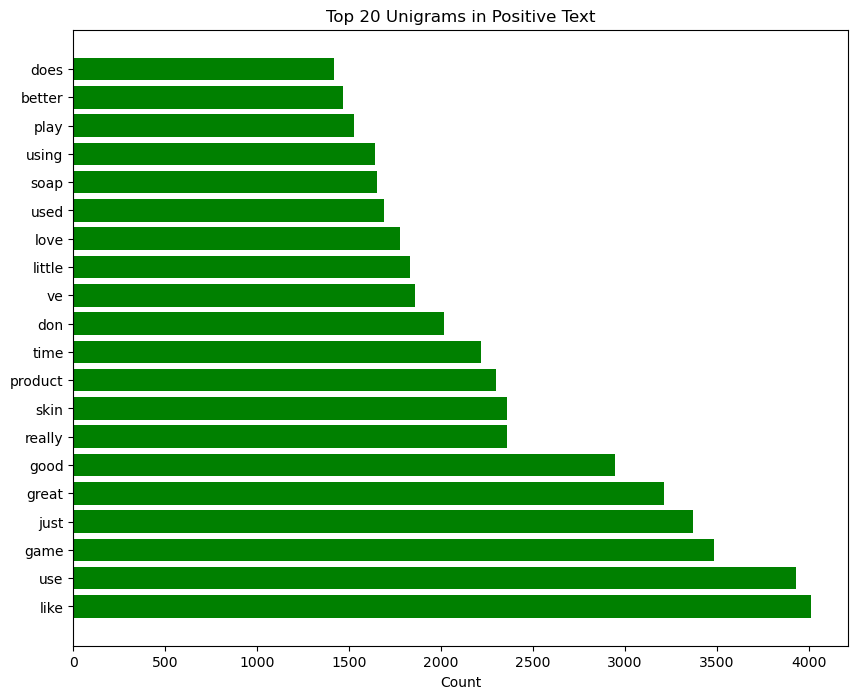

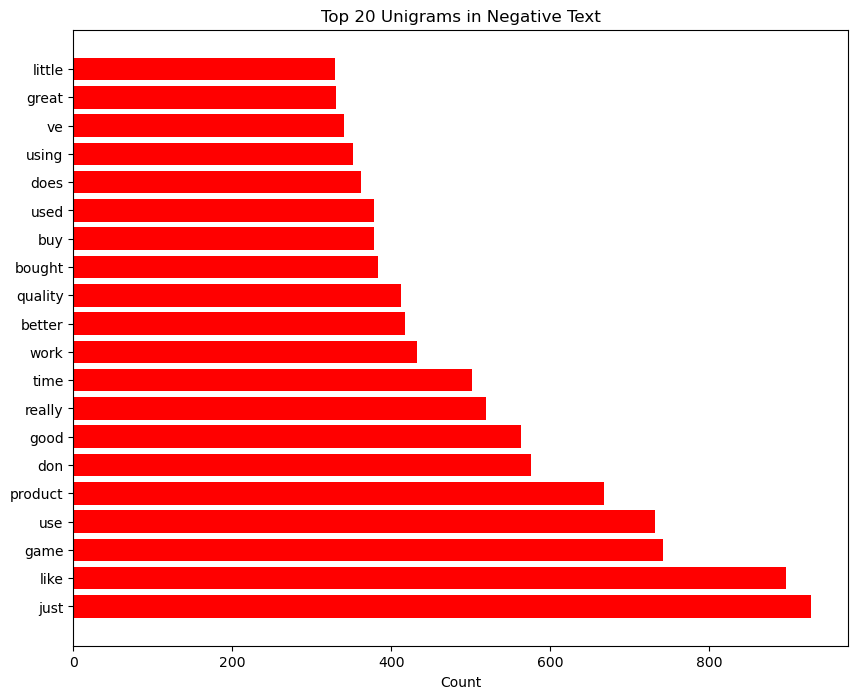

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already defined get_top_n_words() function and pos, neg DataFrames

from sklearn.feature_extraction.text import CountVectorizer

pos_unigrams = get_top_n_words(pos['reviewText'], 20)
neg_unigrams = get_top_n_words(neg['reviewText'], 20)

df1 = pd.DataFrame(pos_unigrams, columns=['Text', 'count'])
df1_grouped = df1.groupby('Text').sum()['count'].sort_values(ascending=True)

# Plotting positive unigrams
plt.figure(figsize=(10, 8))
plt.barh(df1_grouped.index, df1_grouped.values, color='green')
plt.xlabel('Count')
plt.title('Top 20 Unigrams in Positive Text')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

df2 = pd.DataFrame(neg_unigrams, columns=['Text', 'count'])
df2_grouped = df2.groupby('Text').sum()['count'].sort_values(ascending=True)

# Plotting negative unigrams
plt.figure(figsize=(10, 8))
plt.barh(df2_grouped.index, df2_grouped.values, color='red')
plt.xlabel('Count')
plt.title('Top 20 Unigrams in Negative Text')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     /home/moeingcp2024/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/moeingcp2024/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


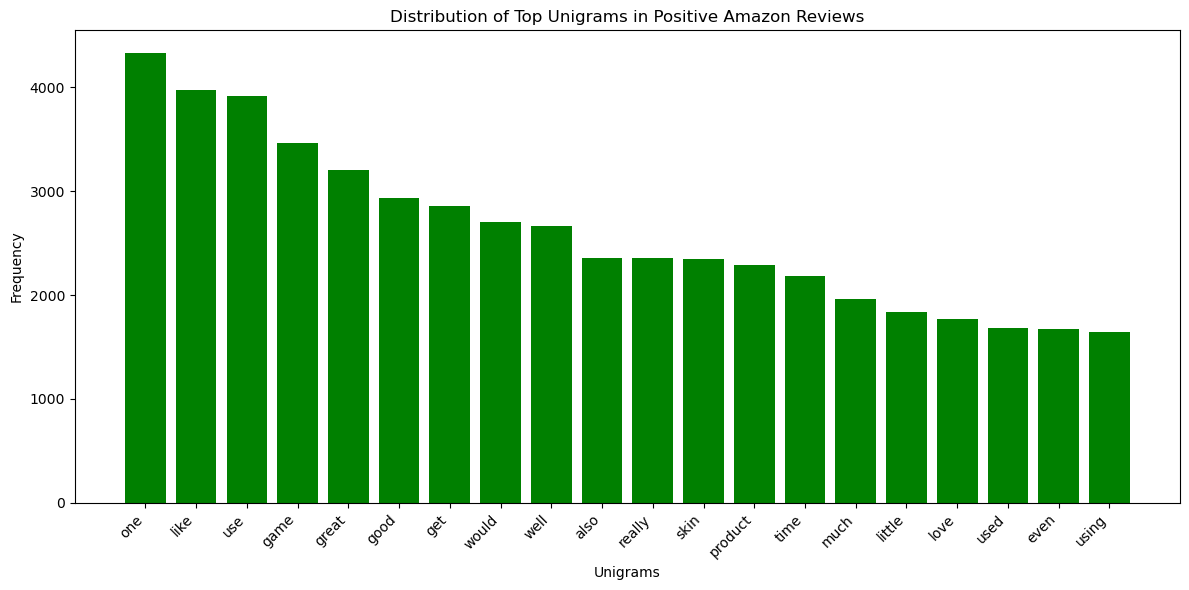

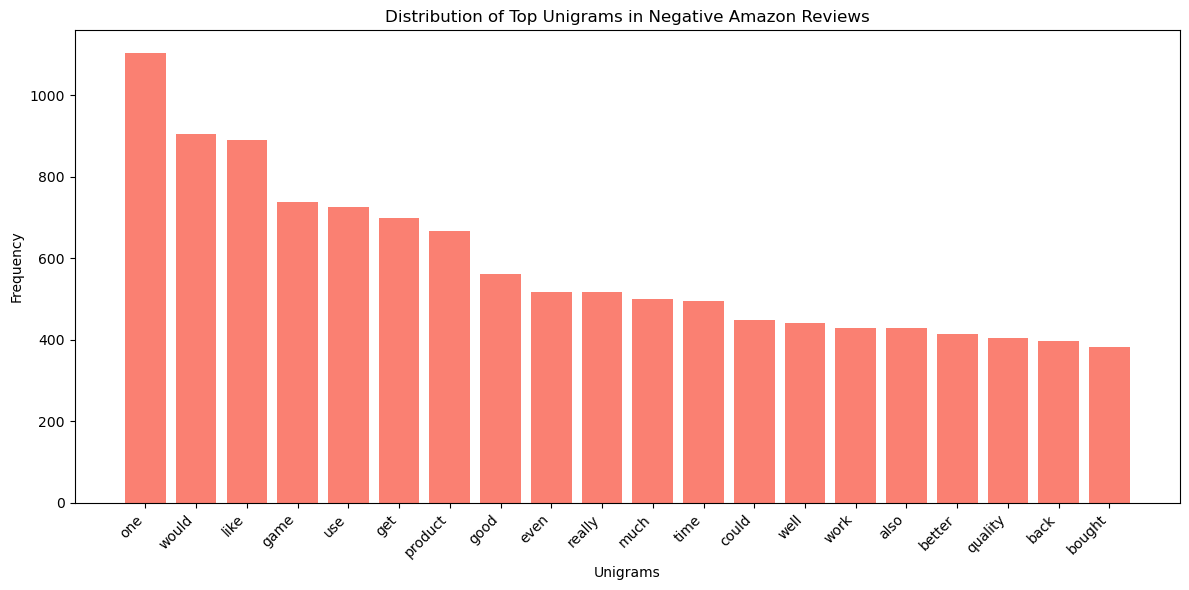

In [114]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import bigrams
from collections import Counter
import matplotlib.pyplot as plt

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Filter reviews for positive sentiment
positive_reviews = ' '.join(df[df['Sentiment Label'] == 'positive']['reviewText'])

# Tokenize the positive review text into unigrams
positive_tokens = word_tokenize(positive_reviews.lower())

# Remove stopwords from positive tokens
stop_words = set(stopwords.words('english'))
filtered_positive_tokens = [word for word in positive_tokens if word.isalnum() and word not in stop_words]

# Count the occurrences of each unigram in positive reviews
positive_unigram_counts = Counter(filtered_positive_tokens)

# Select the top unigrams based on their frequencies (e.g., top 20) for positive reviews
top_positive_unigrams = positive_unigram_counts.most_common(20)

# Extract unigram and frequency pairs for positive reviews
positive_unigrams, positive_frequencies = zip(*top_positive_unigrams)

# Plot the distribution of top unigrams for positive reviews
plt.figure(figsize=(12, 6))
plt.bar(positive_unigrams, positive_frequencies, color='green')
plt.xlabel('Unigrams')
plt.ylabel('Frequency')
plt.title('Distribution of Top Unigrams in Positive Amazon Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Filter reviews for negative sentiment
negative_reviews = ' '.join(df[df['Sentiment Label'] == 'Negative']['reviewText'])

# Tokenize the negative review text into unigrams
negative_tokens = word_tokenize(negative_reviews.lower())

# Remove stopwords from negative tokens
filtered_negative_tokens = [word for word in negative_tokens if word.isalnum() and word not in stop_words]

# Count the occurrences of each unigram in negative reviews
negative_unigram_counts = Counter(filtered_negative_tokens)

# Select the top unigrams based on their frequencies (e.g., top 20) for negative reviews
top_negative_unigrams = negative_unigram_counts.most_common(20)

# Extract unigram and frequency pairs for negative reviews
negative_unigrams, negative_frequencies = zip(*top_negative_unigrams)

# Plot the distribution of top unigrams for negative reviews
plt.figure(figsize=(12, 6))
plt.bar(negative_unigrams, negative_frequencies, color='salmon')
plt.xlabel('Unigrams')
plt.ylabel('Frequency')
plt.title('Distribution of Top Unigrams in Negative Amazon Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Distribution of top Bigrams

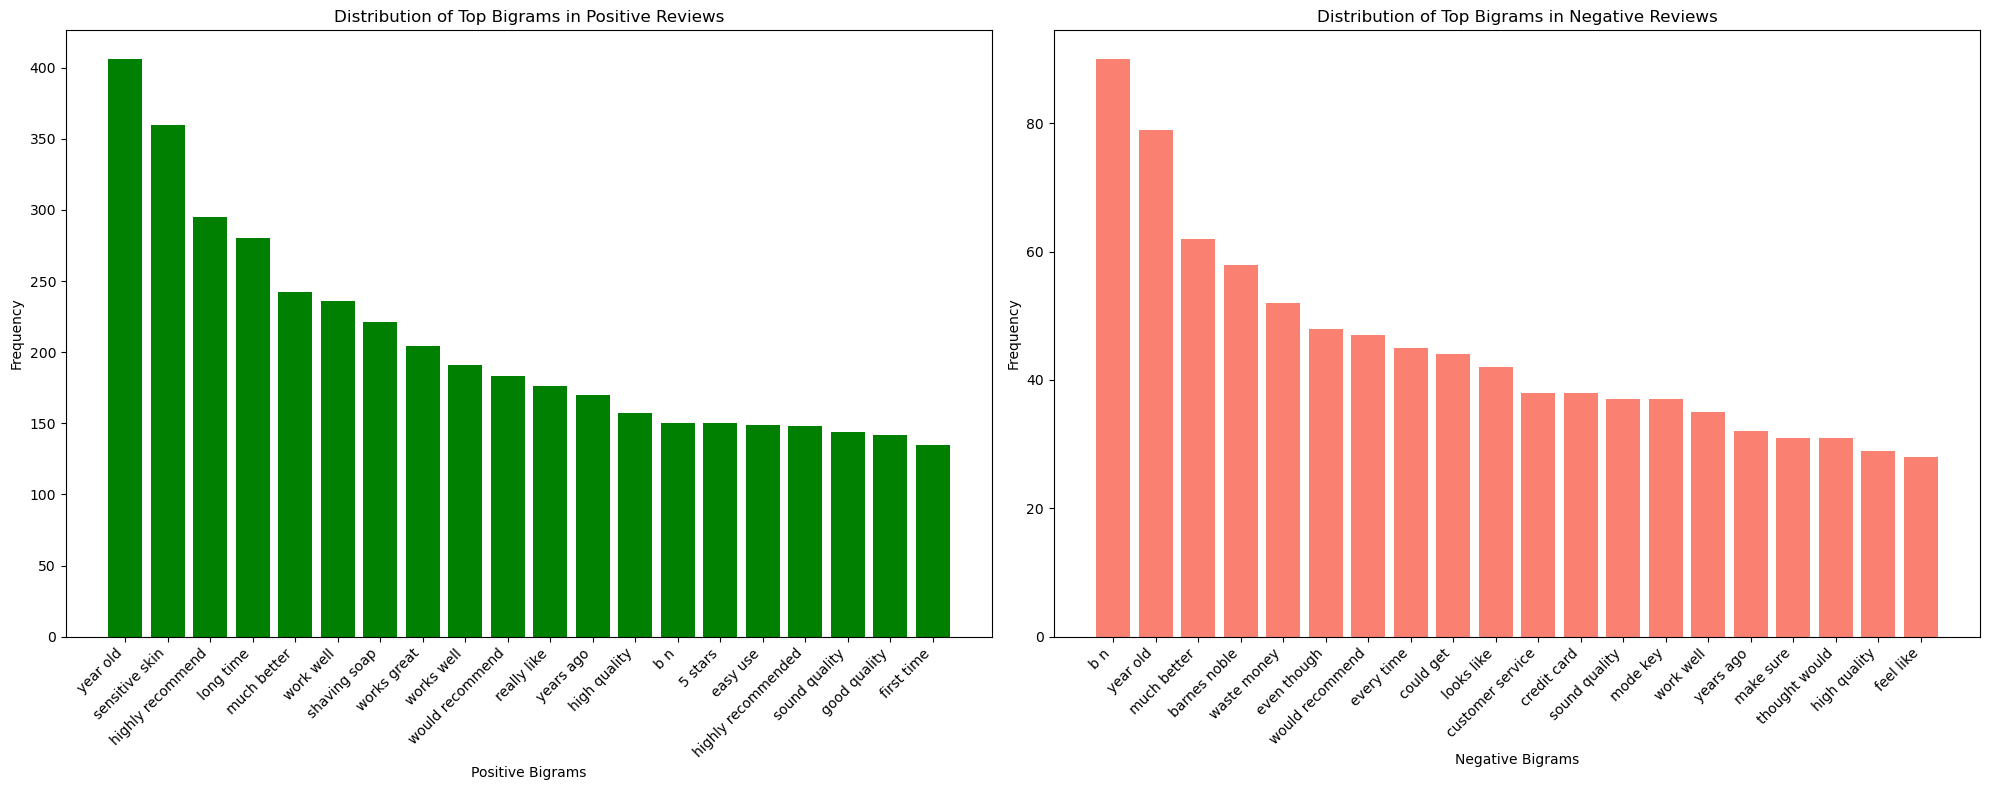

In [115]:

# Assuming df is your DataFrame containing the reviewText and sentiment label column
# Replace 'reviewText' and 'Sentiment Label' with the actual column names if different
positive_reviews = ' '.join(df[df['Sentiment Label'] == 'positive']['reviewText'])
negative_reviews = ' '.join(df[df['Sentiment Label'] == 'Negative']['reviewText'])

# Tokenize the positive reviews into bigrams
positive_tokens = word_tokenize(positive_reviews.lower())
stop_words = set(stopwords.words('english'))
positive_filtered_tokens = [word for word in positive_tokens if word.isalnum() and word not in stop_words]
positive_bigram_tokens = list(bigrams(positive_filtered_tokens))

# Tokenize the negative reviews into bigrams
negative_tokens = word_tokenize(negative_reviews.lower())
negative_filtered_tokens = [word for word in negative_tokens if word.isalnum() and word not in stop_words]
negative_bigram_tokens = list(bigrams(negative_filtered_tokens))

# Count the occurrences of each bigram for positive and negative reviews separately
positive_bigram_counts = Counter(positive_bigram_tokens)
negative_bigram_counts = Counter(negative_bigram_tokens)

# Select the top bigrams based on their frequencies (e.g., top 20) for positive and negative reviews separately
top_positive_bigrams = positive_bigram_counts.most_common(20)
top_negative_bigrams = negative_bigram_counts.most_common(20)

# Extract bigram and frequency pairs for positive and negative reviews separately
positive_bigrams, positive_frequencies = zip(*top_positive_bigrams)
negative_bigrams, negative_frequencies = zip(*top_negative_bigrams) if top_negative_bigrams else ([], [])

# Convert bigrams to string format for plotting
positive_bigram_strings = [' '.join(bigram) for bigram in positive_bigrams]
negative_bigram_strings = [' '.join(bigram) for bigram in negative_bigrams]

# Plot the distribution of top bigrams for positive and negative reviews separately
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.bar(positive_bigram_strings, positive_frequencies, color='green')
plt.xlabel('Positive Bigrams')
plt.ylabel('Frequency')
plt.title('Distribution of Top Bigrams in Positive Reviews')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
if negative_bigram_strings:  # Check if there are negative bigrams
    plt.bar(negative_bigram_strings, negative_frequencies, color='salmon')
    plt.xlabel('Negative Bigrams')
    plt.ylabel('Frequency')
    plt.title('Distribution of Top Bigrams in Negative Reviews')
    plt.xticks(rotation=45, ha='right')
else:
    plt.text(0.5, 0.5, 'No negative bigrams found', horizontalalignment='center', verticalalignment='center', fontsize=12, color='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


### Distribution of top Trigrams

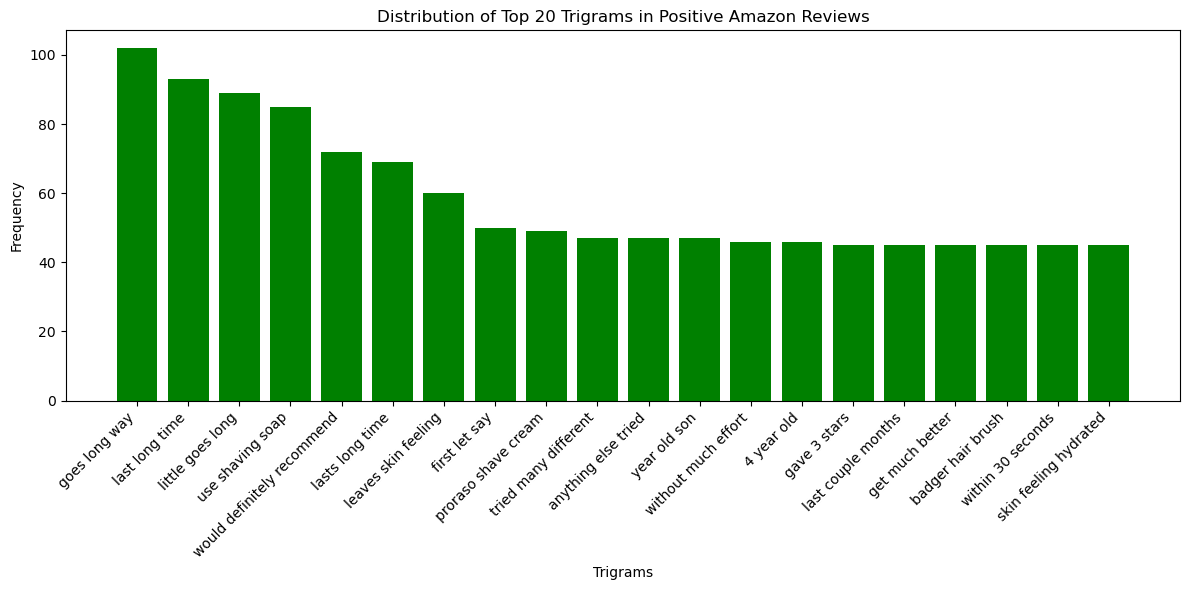

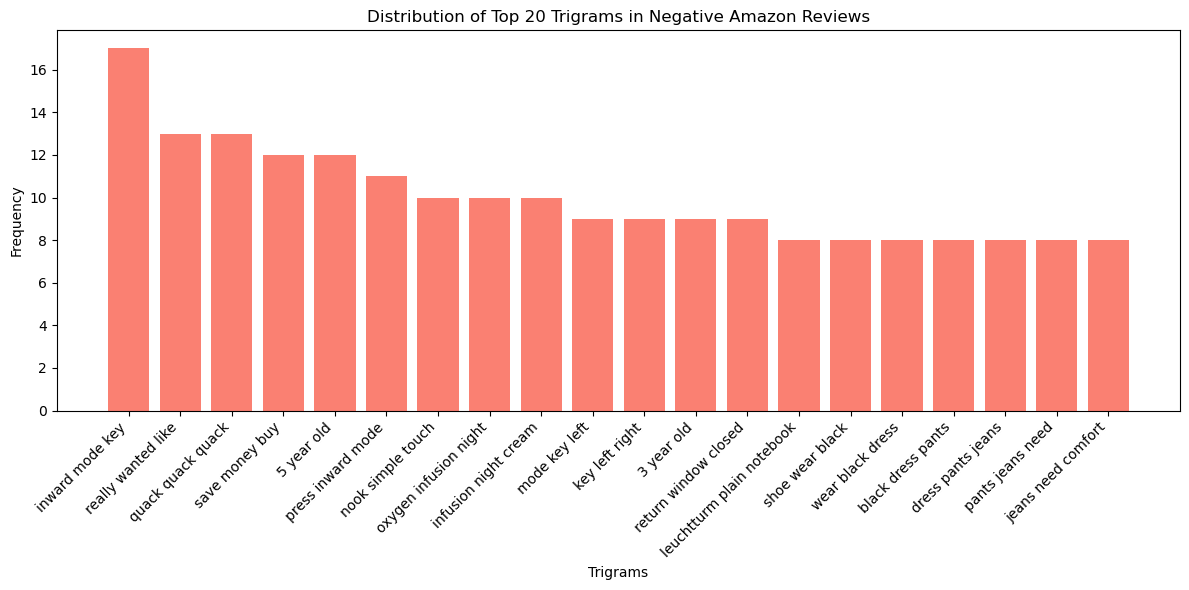

In [116]:


# Filter reviews for positive sentiment
positive_reviews = ' '.join(df[df['Sentiment Label'] == 'positive']['reviewText'])

# Tokenize the positive review text into words
positive_tokens = word_tokenize(positive_reviews.lower())

# Remove stopwords from positive tokens
stop_words = set(stopwords.words('english'))
filtered_positive_tokens = [word for word in positive_tokens if word.isalnum() and word not in stop_words]

# Generate trigrams from the positive tokens
positive_trigrams = list(ngrams(filtered_positive_tokens, 3))

# Count the occurrences of each trigram in positive reviews
positive_trigram_counts = Counter(positive_trigrams)

# Select the top trigrams based on their frequencies (e.g., top 20) for positive reviews
top_positive_trigrams = positive_trigram_counts.most_common(20)

# Extract trigram and frequency pairs for positive reviews
positive_trigrams, positive_frequencies = zip(*top_positive_trigrams)

# Convert trigrams to string format for plotting
positive_trigram_strings = [' '.join(trigram) for trigram in positive_trigrams]

# Plot the distribution of top trigrams for positive reviews
plt.figure(figsize=(12, 6))
plt.bar(positive_trigram_strings, positive_frequencies, color='green')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.title('Distribution of Top 20 Trigrams in Positive Amazon Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Filter reviews for negative sentiment
negative_reviews = ' '.join(df[df['Sentiment Label'] == 'Negative']['reviewText'])

# Tokenize the negative review text into words
negative_tokens = word_tokenize(negative_reviews.lower())

# Remove stopwords from negative tokens
filtered_negative_tokens = [word for word in negative_tokens if word.isalnum() and word not in stop_words]

# Generate trigrams from the negative tokens
negative_trigrams = list(ngrams(filtered_negative_tokens, 3))

# Count the occurrences of each trigram in negative reviews
negative_trigram_counts = Counter(negative_trigrams)

# Select the top trigrams based on their frequencies (e.g., top 20) for negative reviews
top_negative_trigrams = negative_trigram_counts.most_common(20)

# Extract trigram and frequency pairs for negative reviews
negative_trigrams, negative_frequencies = zip(*top_negative_trigrams)

# Convert trigrams to string format for plotting
negative_trigram_strings = [' '.join(trigram) for trigram in negative_trigrams]

# Plot the distribution of top trigrams for negative reviews
plt.figure(figsize=(12, 6))
plt.bar(negative_trigram_strings, negative_frequencies, color='salmon')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.title('Distribution of Top 20 Trigrams in Negative Amazon Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Wordclouds
create wordclouds to see which words contribute to which type of polarity.

In [88]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

def text_preprocessing(text):
    """
    Cleaning and parsing the text.

    """
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    #remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(tokenized_text)
    return combined_text

In [91]:
import re
import string

df['text_clean'] = df['reviewText'].apply(str).apply(lambda x: text_preprocessing(x))


In [92]:
positive_text = df[df['Sentiment Label'] == 'positive']['reviewText']
negative_text = df[df['Sentiment Label'] == 'Negative']['reviewText']

In [93]:
import nltk

positive_text_clean = positive_text.apply(lambda x: text_preprocessing(x))
negative_text_clean = negative_text.apply(lambda x: text_preprocessing(x))

In [94]:
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [95]:
top_words_in_positive_text = get_top_n_words(positive_text_clean)
top_words_in_negative_text = get_top_n_words(negative_text_clean)

p1 = [x[0] for x in top_words_in_positive_text[:20]]
p2 = [x[1] for x in top_words_in_positive_text[:20]]


n1 = [x[0] for x in top_words_in_negative_text[:20]]
n2 = [x[1] for x in top_words_in_negative_text[:20]]


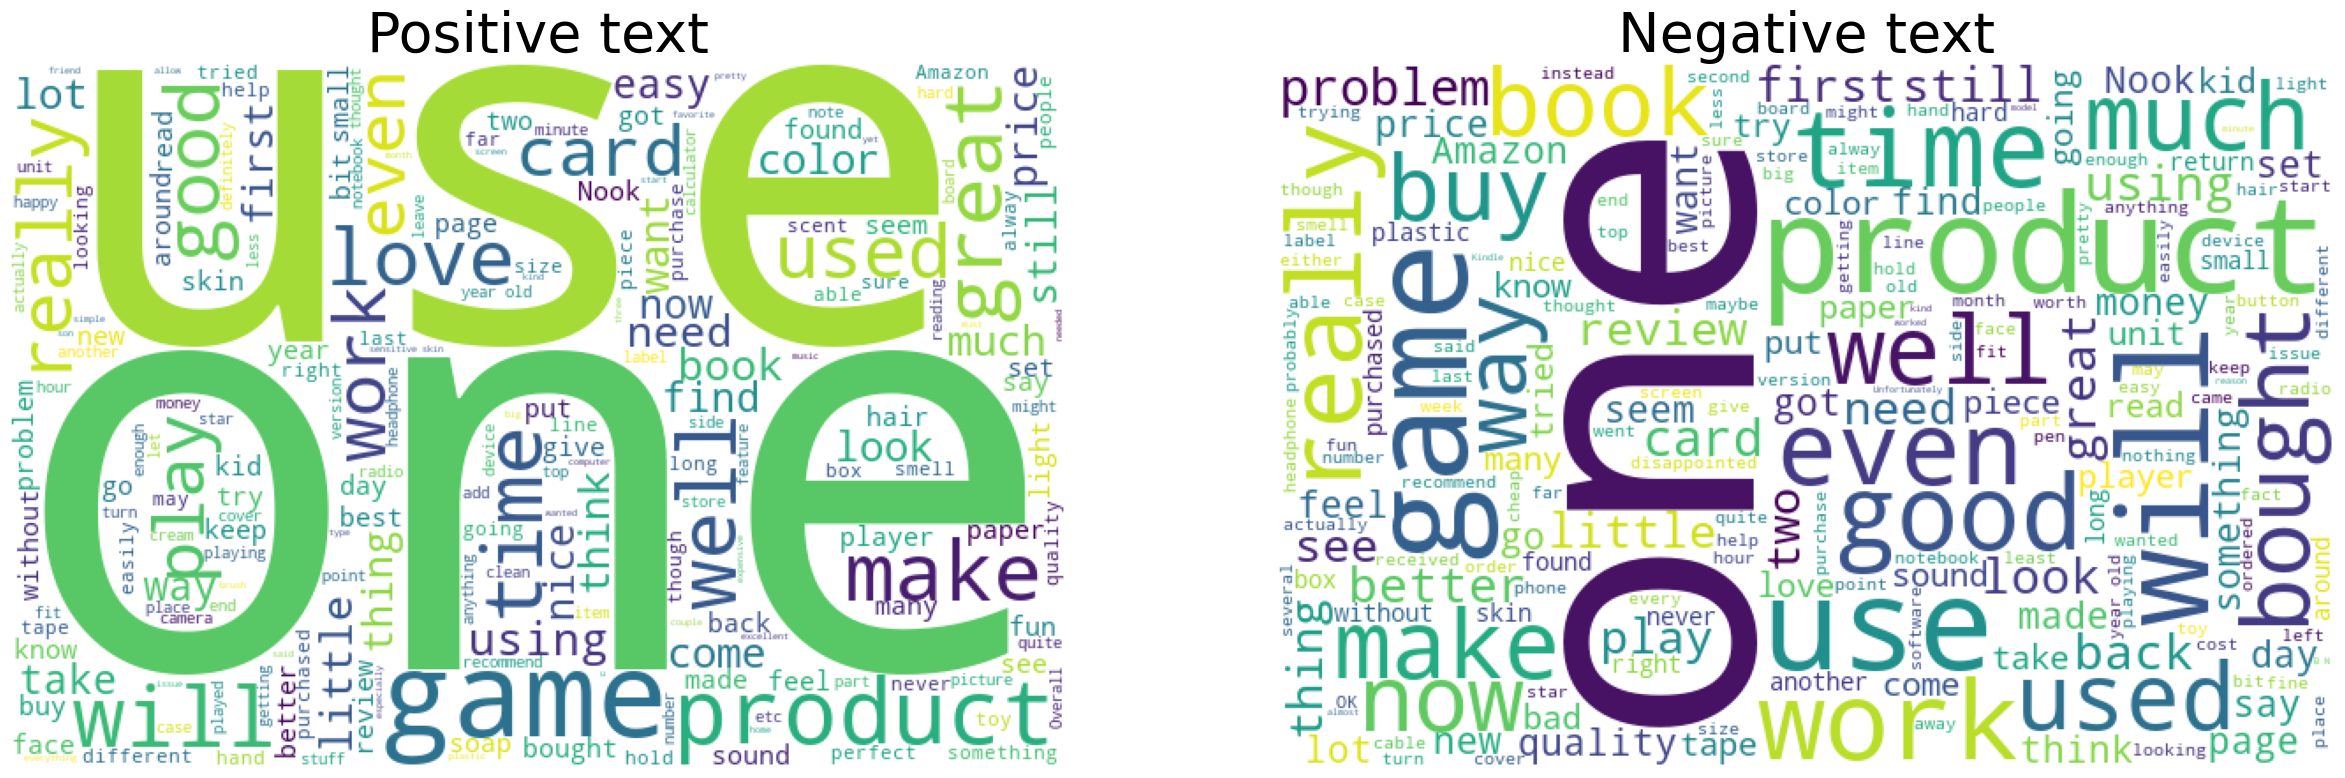

In [100]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the reviewText column and Sentiment Label column
# Replace 'Sentiment Label' with the actual column name if different
pos_cleaned = df[df['Sentiment Label'] == 'positive']['reviewText'].tolist()
neg_cleaned = df[df['Sentiment Label'] == 'Negative']['reviewText'].tolist()

# Check if pos_cleaned and neg_cleaned are not empty
if pos_cleaned and neg_cleaned:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[30, 15])

    wordcloud1 = WordCloud(background_color='white',
                           width=600,
                           height=400).generate(" ".join(pos_cleaned))
    ax1.imshow(wordcloud1)
    ax1.axis('off')
    ax1.set_title('Positive text', fontsize=40)

    wordcloud2 = WordCloud(background_color='white',
                           width=600,
                           height=400).generate(" ".join(neg_cleaned))
    ax2.imshow(wordcloud2)
    ax2.axis('off')
    ax2.set_title('Negative text', fontsize=40)

    plt.show()
else:
    print("No data available for word cloud generation.")
